# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male'].copy()
female_df =  data[data['Gender'] == 'Female'].copy()

print(f'Male Height Mean : {male_df["Height"].mean()}')
print(f'Male Height SD : {male_df["Height"].std()}')
print(f'Male Weight Mean : {male_df["Weight"].mean()}')
print(f'Male Weight SD : {male_df["Weight"].std()}')
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813

print(f'Female Height Mean : {female_df["Height"].mean()}')
print(f'Female Height SD : {female_df["Height"].std()}')
print(f'Female Weight Mean : {female_df["Weight"].mean()}')
print(f'Female Weight SD : {female_df["Weight"].std()}')
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height Mean : 69.02634590621741
Male Height SD : 2.863362228660647
Male Weight Mean : 187.0206206581932
Male Weight SD : 19.7811545167638
Female Height Mean : 63.70877360342507
Female Height SD : 2.696284015765054
Female Weight Mean : 135.86009300746835
Female Weight SD : 19.022467805319028


In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

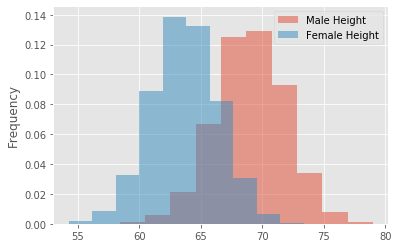

In [4]:
ax1 = plt.hist(male_df['Height'],bins = 10, density = True,label = 'Male Height', alpha = .5)
ax2 =plt.hist(female_df['Height'],bins = 10, density = True,label = 'Female Height', alpha = .5)
plt.ylabel('Frequency')
plt.legend()

In [5]:
# Your code here

In [6]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [7]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

In [8]:
np.histogram(s)

(array([ 1,  1,  4,  8, 27, 22, 16, 12,  6,  3]),
 array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
        -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
         0.24307712]))

In [10]:
my_hist = np.histogram(s, density = True)

In [11]:
my_hist[0]

array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
       4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853])

In [12]:
my_hist[1]

array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
       -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
        0.24307712])

In [19]:
density_x = []
for counter, x in enumerate(my_hist[1]):
        if counter + 1 < len(my_hist[1]):
            density_x.append((x + my_hist[1][counter + 1]) / 2)

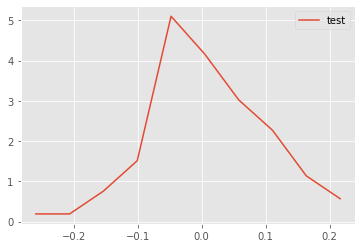

In [25]:
def density(my_array):
    
    my_hist = np.histogram(my_array, density = True)
    density_x = []
    for counter, x in enumerate(my_hist[1]):
        if counter + 1 < len(my_hist[1]):
            density_x.append((x + my_hist[1][counter + 1]) / 2)
        
    return density_x, my_hist[0]


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

(array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
        4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853]),
 array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
        -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
         0.24307712]),
 <a list of 10 Patch objects>)

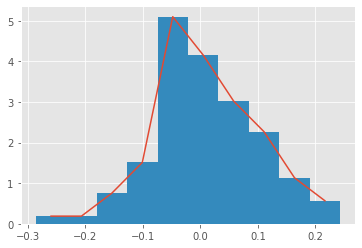

In [26]:
plt.plot(density_x, my_hist[0])
plt.hist(s, density = True)

## Add overlapping density plots to the histograms plotted earlier

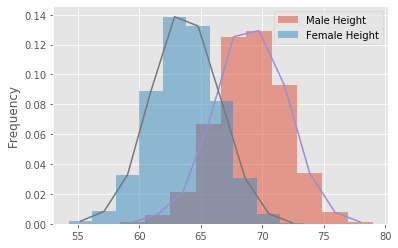

In [28]:
# Your code here 
ax1 = plt.hist(male_df['Height'],bins = 10, density = True,label = 'Male Height', alpha = .5)
ax2 =plt.hist(female_df['Height'],bins = 10, density = True,label = 'Female Height', alpha = .5)
x_men,y_men = density(male_df['Height'])
plt.plot(x_men,y_men)
x_female,y_female = density(female_df['Height'])
plt.plot(x_female,y_female)
plt.ylabel('Frequency')
plt.legend()

## Repeat the above exercise for male and female weights

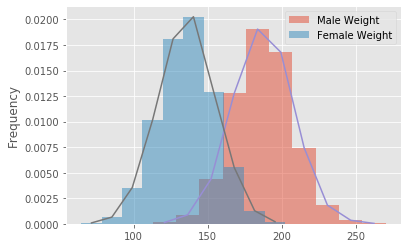

In [29]:
# Your code here 
ax1 = plt.hist(male_df['Weight'],bins = 10, density = True,label = 'Male Weight', alpha = .5)
ax2 =plt.hist(female_df['Weight'],bins = 10, density = True,label = 'Female Weight', alpha = .5)
x_men,y_men = density(male_df['Weight'])
plt.plot(x_men,y_men)
x_female,y_female = density(female_df['Weight'])
plt.plot(x_female,y_female)
plt.ylabel('Frequency')
plt.legend()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


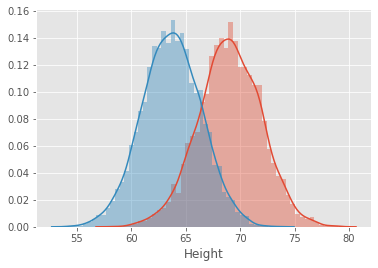

In [30]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])

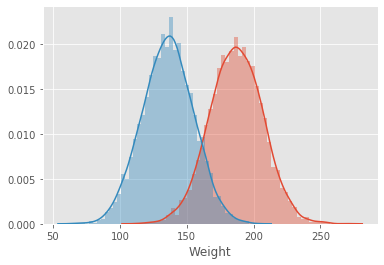

In [31]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])

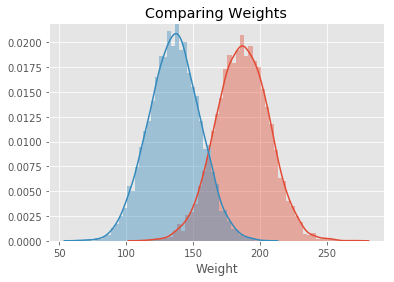

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.